In [1]:
import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import random
import numpy as np
from matplotlib.patches import Polygon
from geopy.distance import great_circle

import os
import sys

current_dir = os.getcwd()
sys.path.append(os.path.dirname(current_dir))

In [2]:
df_baseline = pd.read_csv('../results/QPA_track_data/CMA_baseline_track.csv')
df_classical_model = pd.read_csv('../results/QPA_track_data/track_data_cy.csv')
df_model = pd.read_csv('../results/QPA_track_data/track_data_QT_lora_setting_8_ck_768_qnn_depth_20.csv')

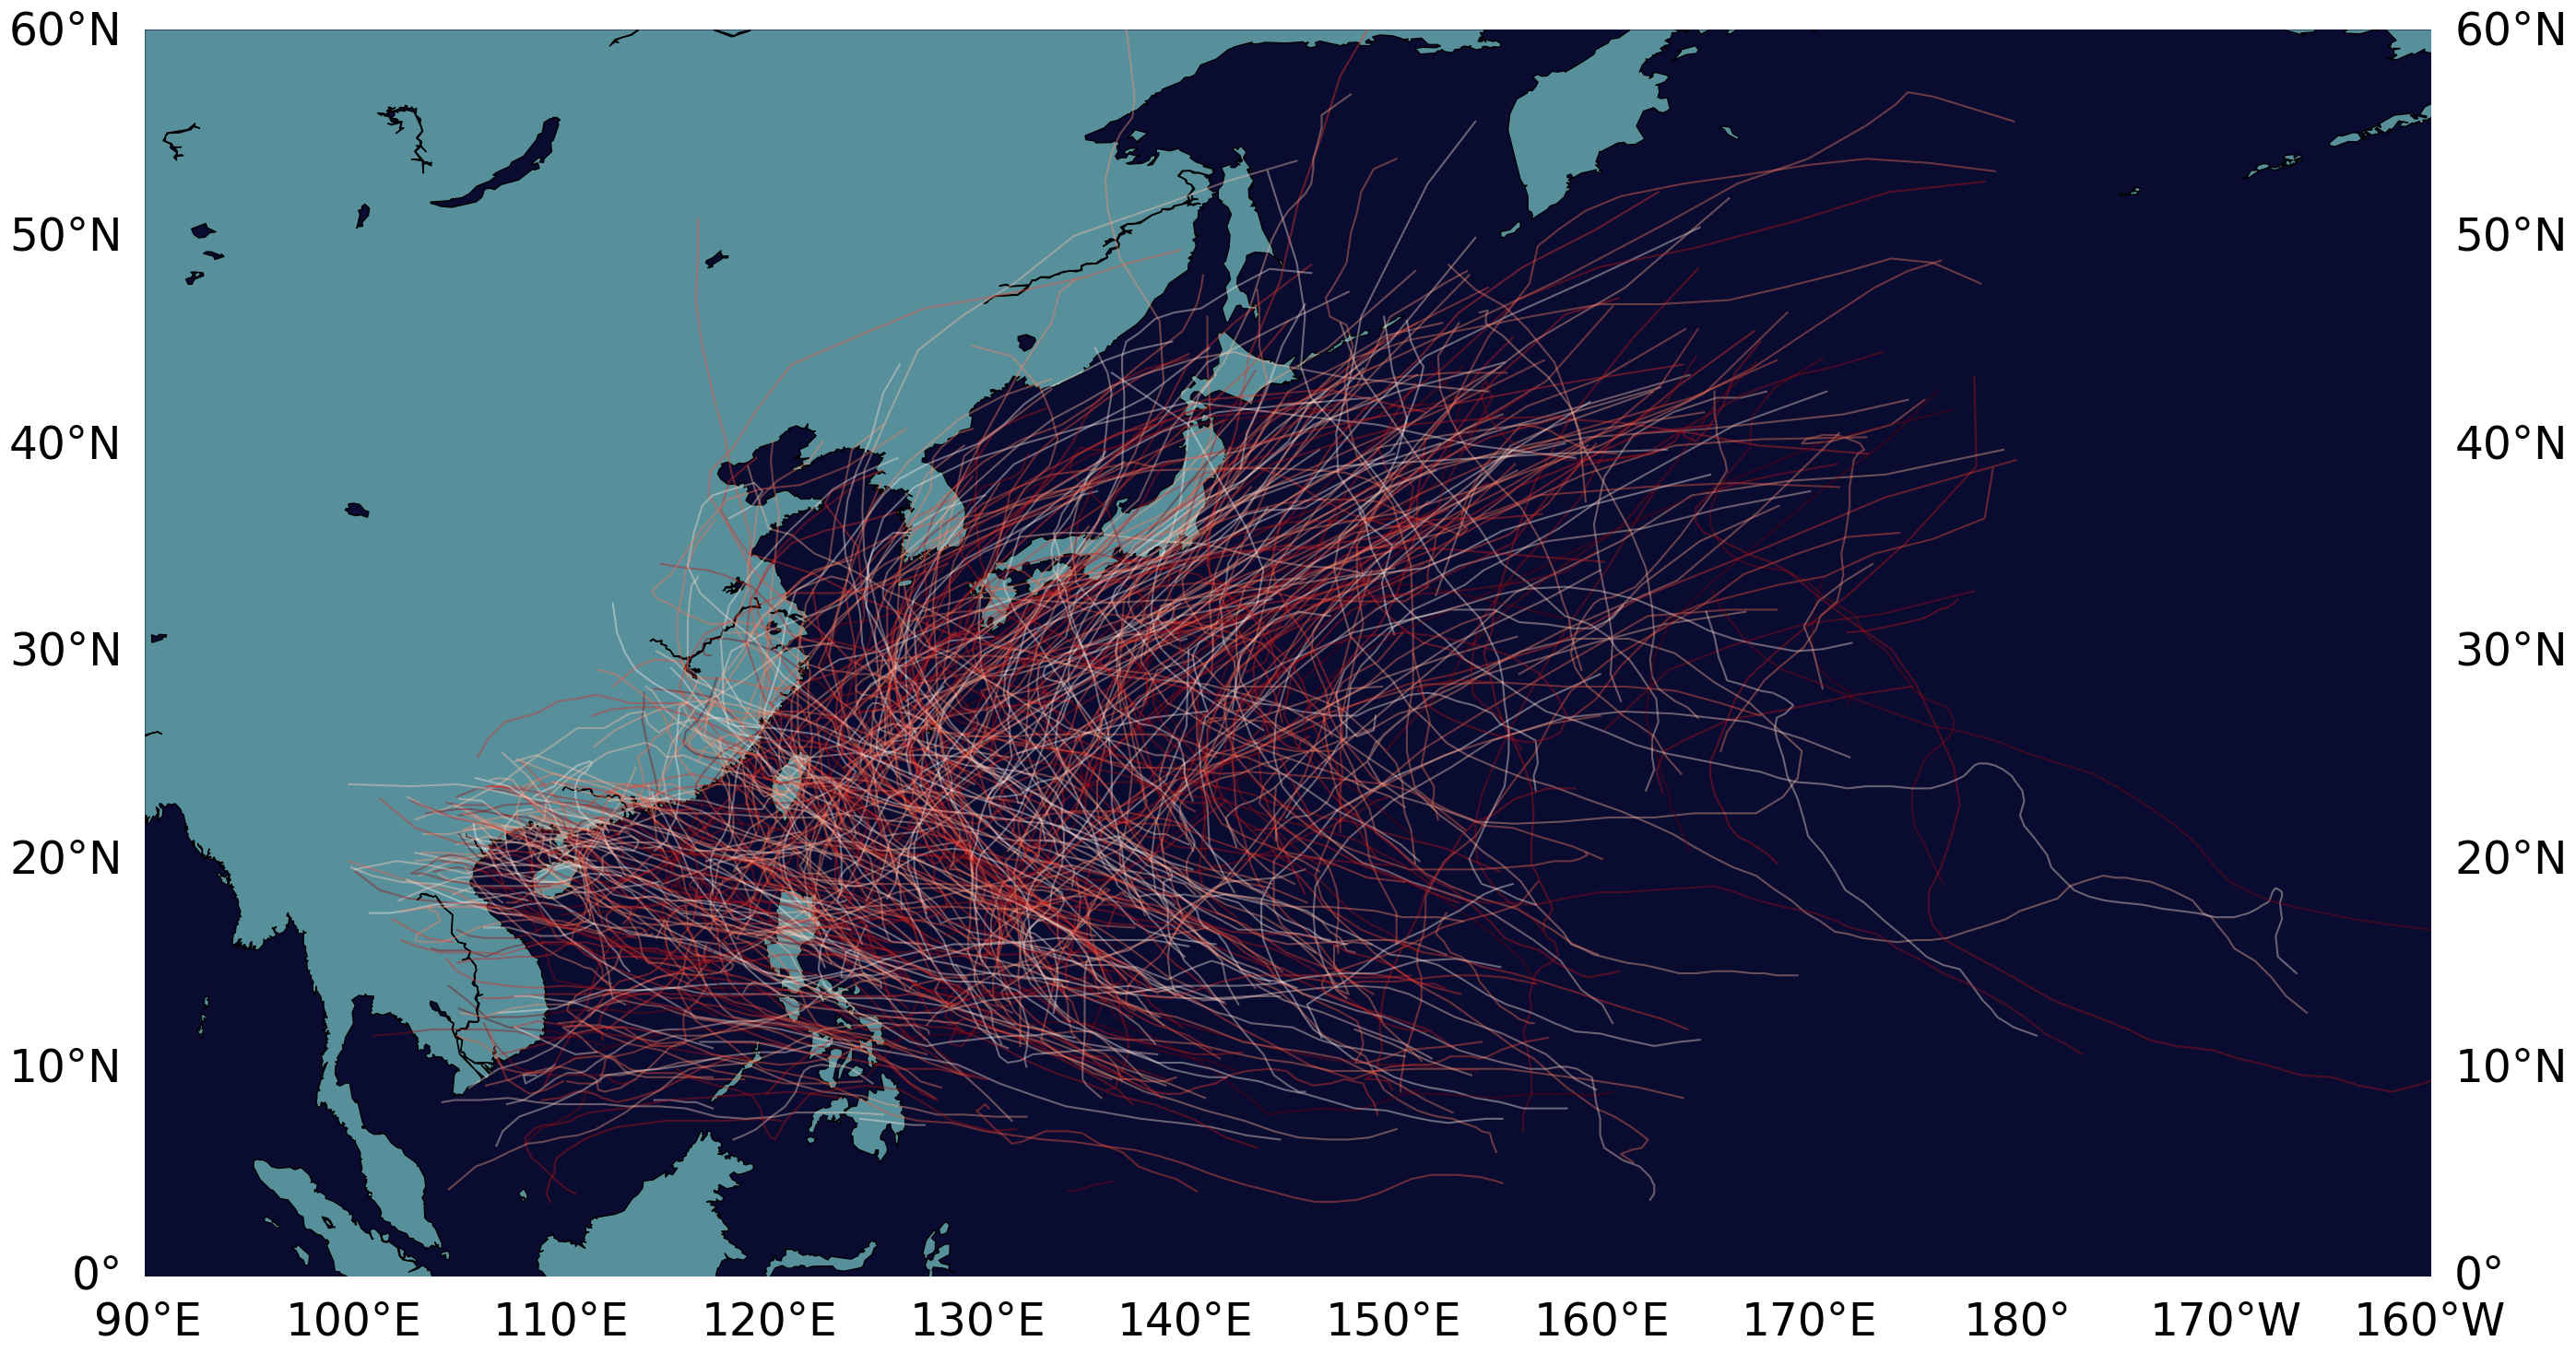

In [3]:
tids = df_baseline['TID'].unique()

fig = plt.figure(figsize=(32,40))
map = Basemap(resolution='l',
              llcrnrlon=90, 
              llcrnrlat=0, 
              urcrnrlon=200, 
              urcrnrlat=60)


# draw
map.drawcoastlines()

CHN = "../data/shapefiles_china/china"# address of shape file
map.readshapefile(CHN,'states',drawbounds=False, linewidth=0.01, color = "k", zorder=100)

map.drawmapboundary(fill_color= "#0A0B31", linewidth=0)#"#CCD3D9") #'#313b54')
map.fillcontinents(color = "#578F9A")#"#92BD72")


map.drawparallels(np.arange(0,90,10),labels=[1,1,0,1],fontsize=35, color = "white", linewidth=0.001)
map.drawmeridians(np.arange(0,360,10),labels=[1,1,0,1],fontsize=35, color = "white", linewidth=0.001)

color = ['#fff5f0', '#ffece3', '#fee3d7', '#fdd6c5', '#fdc7b0', '#fcb79c', 
        '#fca588', '#fc9474', '#fc8363', '#fb7252', '#f86044', '#f34c37', 
        '#ed392b', '#de2a25', '#cf1c1f', '#bf151a', '#af1117', '#9b0d14', 
        '#810610', '#67000d'] # Reds 

for tid in tids[:]:
    color_index = random.randint(0,len(color)-1)
    map.plot(df_baseline[df_baseline['TID']==tid]['LONG'], df_baseline[df_baseline['TID']==tid]['LAT'], color=color[color_index],linewidth=1.5, alpha = 0.4)
plt.savefig("../results/plots/total_data.png", bbox_inches="tight")  # Save as a PDF

plt.show()

In [4]:
# calculated_key_list = [] 

# for key_ in list(df_model['KEY']):
#     if key_ not in calculated_key_list:
#         df_typhoon_baseline = df_baseline[df_baseline['KEY']==key_] # 
#         df_typhoon_classical_model = df_classical_model[df_classical_model['KEY']==key_] # 
#         df_typhoon_model = df_model[df_model['KEY']==key_] # 

#         sum_error = []
#         for i in range(0, len(df_typhoon_baseline["LAT"])):
#             sum_error.append(
#                 great_circle(
#                     (df_typhoon_baseline["PRED_LAT"].to_list()[i], df_typhoon_baseline["PRED_LONG"].to_list()[i]),
#                     (df_typhoon_baseline["LAT"].to_list()[i], df_typhoon_baseline["LONG"].to_list()[i]
#                         )).kilometers)
            
#         baseline_error = sum(sum_error)/len(sum_error)

#         sum_error_cl = []
#         for i in range(0, len(df_typhoon_classical_model["LAT"])):
#             sum_error_cl.append(
#                 great_circle(
#                     (df_typhoon_classical_model["PRED_LAT"].to_list()[i], df_typhoon_classical_model["PRED_LONG"].to_list()[i]),
#                     (df_typhoon_classical_model["LAT"].to_list()[i], df_typhoon_classical_model["LONG"].to_list()[i]
#                         )).kilometers)
            
#         classical_model_error = sum(sum_error_cl)/len(sum_error_cl)

#         sum_error_qpa = []
#         for i in range(0, len(df_typhoon_model["LAT"])):
#             sum_error_qpa.append(
#                 great_circle(
#                     (df_typhoon_model["PRED_LAT"].to_list()[i], df_typhoon_model["PRED_LONG"].to_list()[i]),
#                     (df_typhoon_model["LAT"].to_list()[i], df_typhoon_model["LONG"].to_list()[i]
#                         )).kilometers)
            
#         qpa_model_error = sum(sum_error_qpa)/len(sum_error_qpa)
        
#         if qpa_model_error > classical_model_error:
#             print("======")
#             print("KEY = ", key_)
#             print('baseline avg distance error:', baseline_error)
#             print('classical model avg distance error:', classical_model_error)
#             print('QPA model avg distance error:', qpa_model_error)
#             print("QPA WIN BASELINE ? ", qpa_model_error < baseline_error)
#             print("QPA WIN CLASSICAL ? ", qpa_model_error < classical_model_error)
    
#     calculated_key_list.append(key_)

## QPA Winning cases 

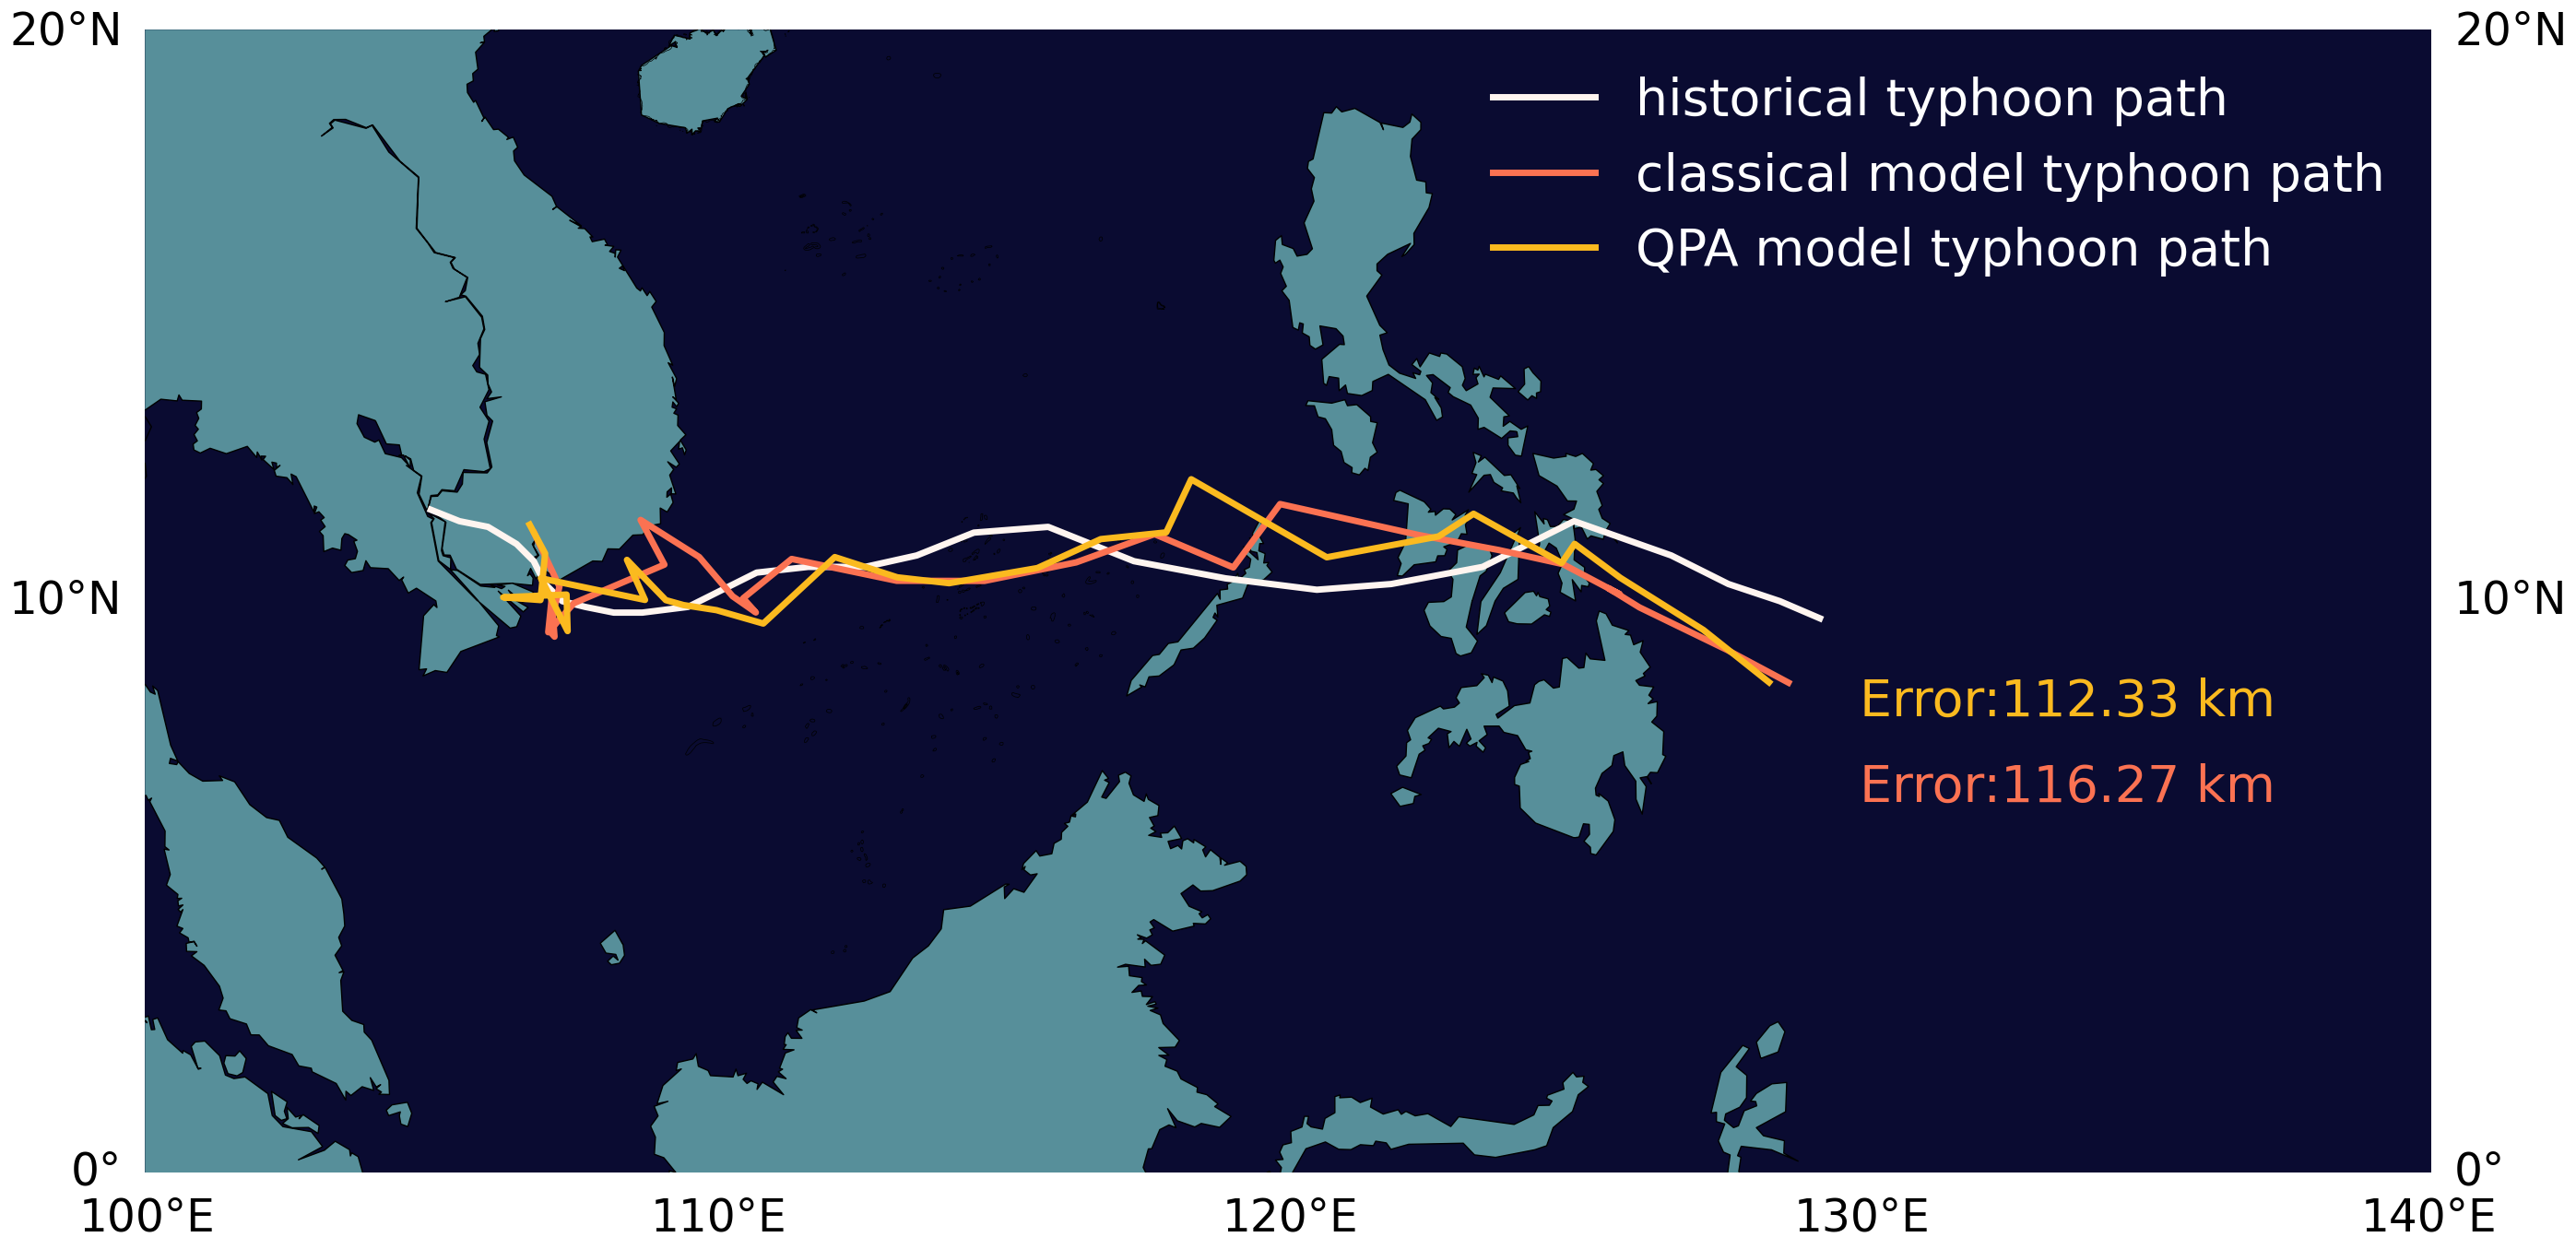

In [5]:
df_typhoon_baseline = df_baseline[df_baseline['KEY']=='2018-32'] # 
df_typhoon_classical_model = df_classical_model[df_classical_model['KEY']=='2018-32'] # 
df_typhoon_model = df_model[df_model['KEY']=='2018-32'] #

fig = plt.figure(figsize=(32,40))
map = Basemap(resolution='l',
              llcrnrlon=100, 
              llcrnrlat=0, 
              urcrnrlon=140, 
              urcrnrlat=20)

# draw
map.drawcoastlines()

CHN = "../data/shapefiles_china/china"# address of shape file
map.readshapefile(CHN,'states',drawbounds=True)

# map.drawmapboundary(fill_color='white')
# map.fillcontinents(color='#D3D3D3')
map.drawmapboundary(fill_color= "#0A0B31", linewidth=0)#"#CCD3D9") #'#313b54')
map.fillcontinents(color = "#578F9A")#"#92BD72")

map.drawparallels(np.arange(0,90,10),labels=[1,1,0,1],fontsize=35, linewidth=0.0001)
map.drawmeridians(np.arange(0,360,10),labels=[1,1,0,1],fontsize=35, linewidth=0.0001)

color = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan']
map.plot(df_typhoon_baseline['LONG'], df_typhoon_baseline['LAT'], color='#fff5f0', linewidth=5, label='historical typhoon path')
map.plot(df_typhoon_classical_model['PRED_LONG'], df_typhoon_classical_model['PRED_LAT'], color='#fb7252',linewidth=5, label='classical model typhoon path') #, linestyle="--")
map.plot(df_typhoon_model['PRED_LONG'], df_typhoon_model['PRED_LAT'], color='#fbba1f',linewidth=5, label='QPA model typhoon path')
plt.legend(loc='upper right', prop={'size':40}, framealpha=0, labelcolor="white")
plt.annotate('Error:116.27 km', xy=(130, 6.5),fontsize='40', color='#fb7252')
plt.annotate('Error:112.33 km', xy=(130, 8),fontsize='40', color='#fbba1f')
# plt.savefig('2018.pdf')
plt.savefig("../results/plots/2018_32.png", bbox_inches="tight")  # Save as a PDF
plt.show()

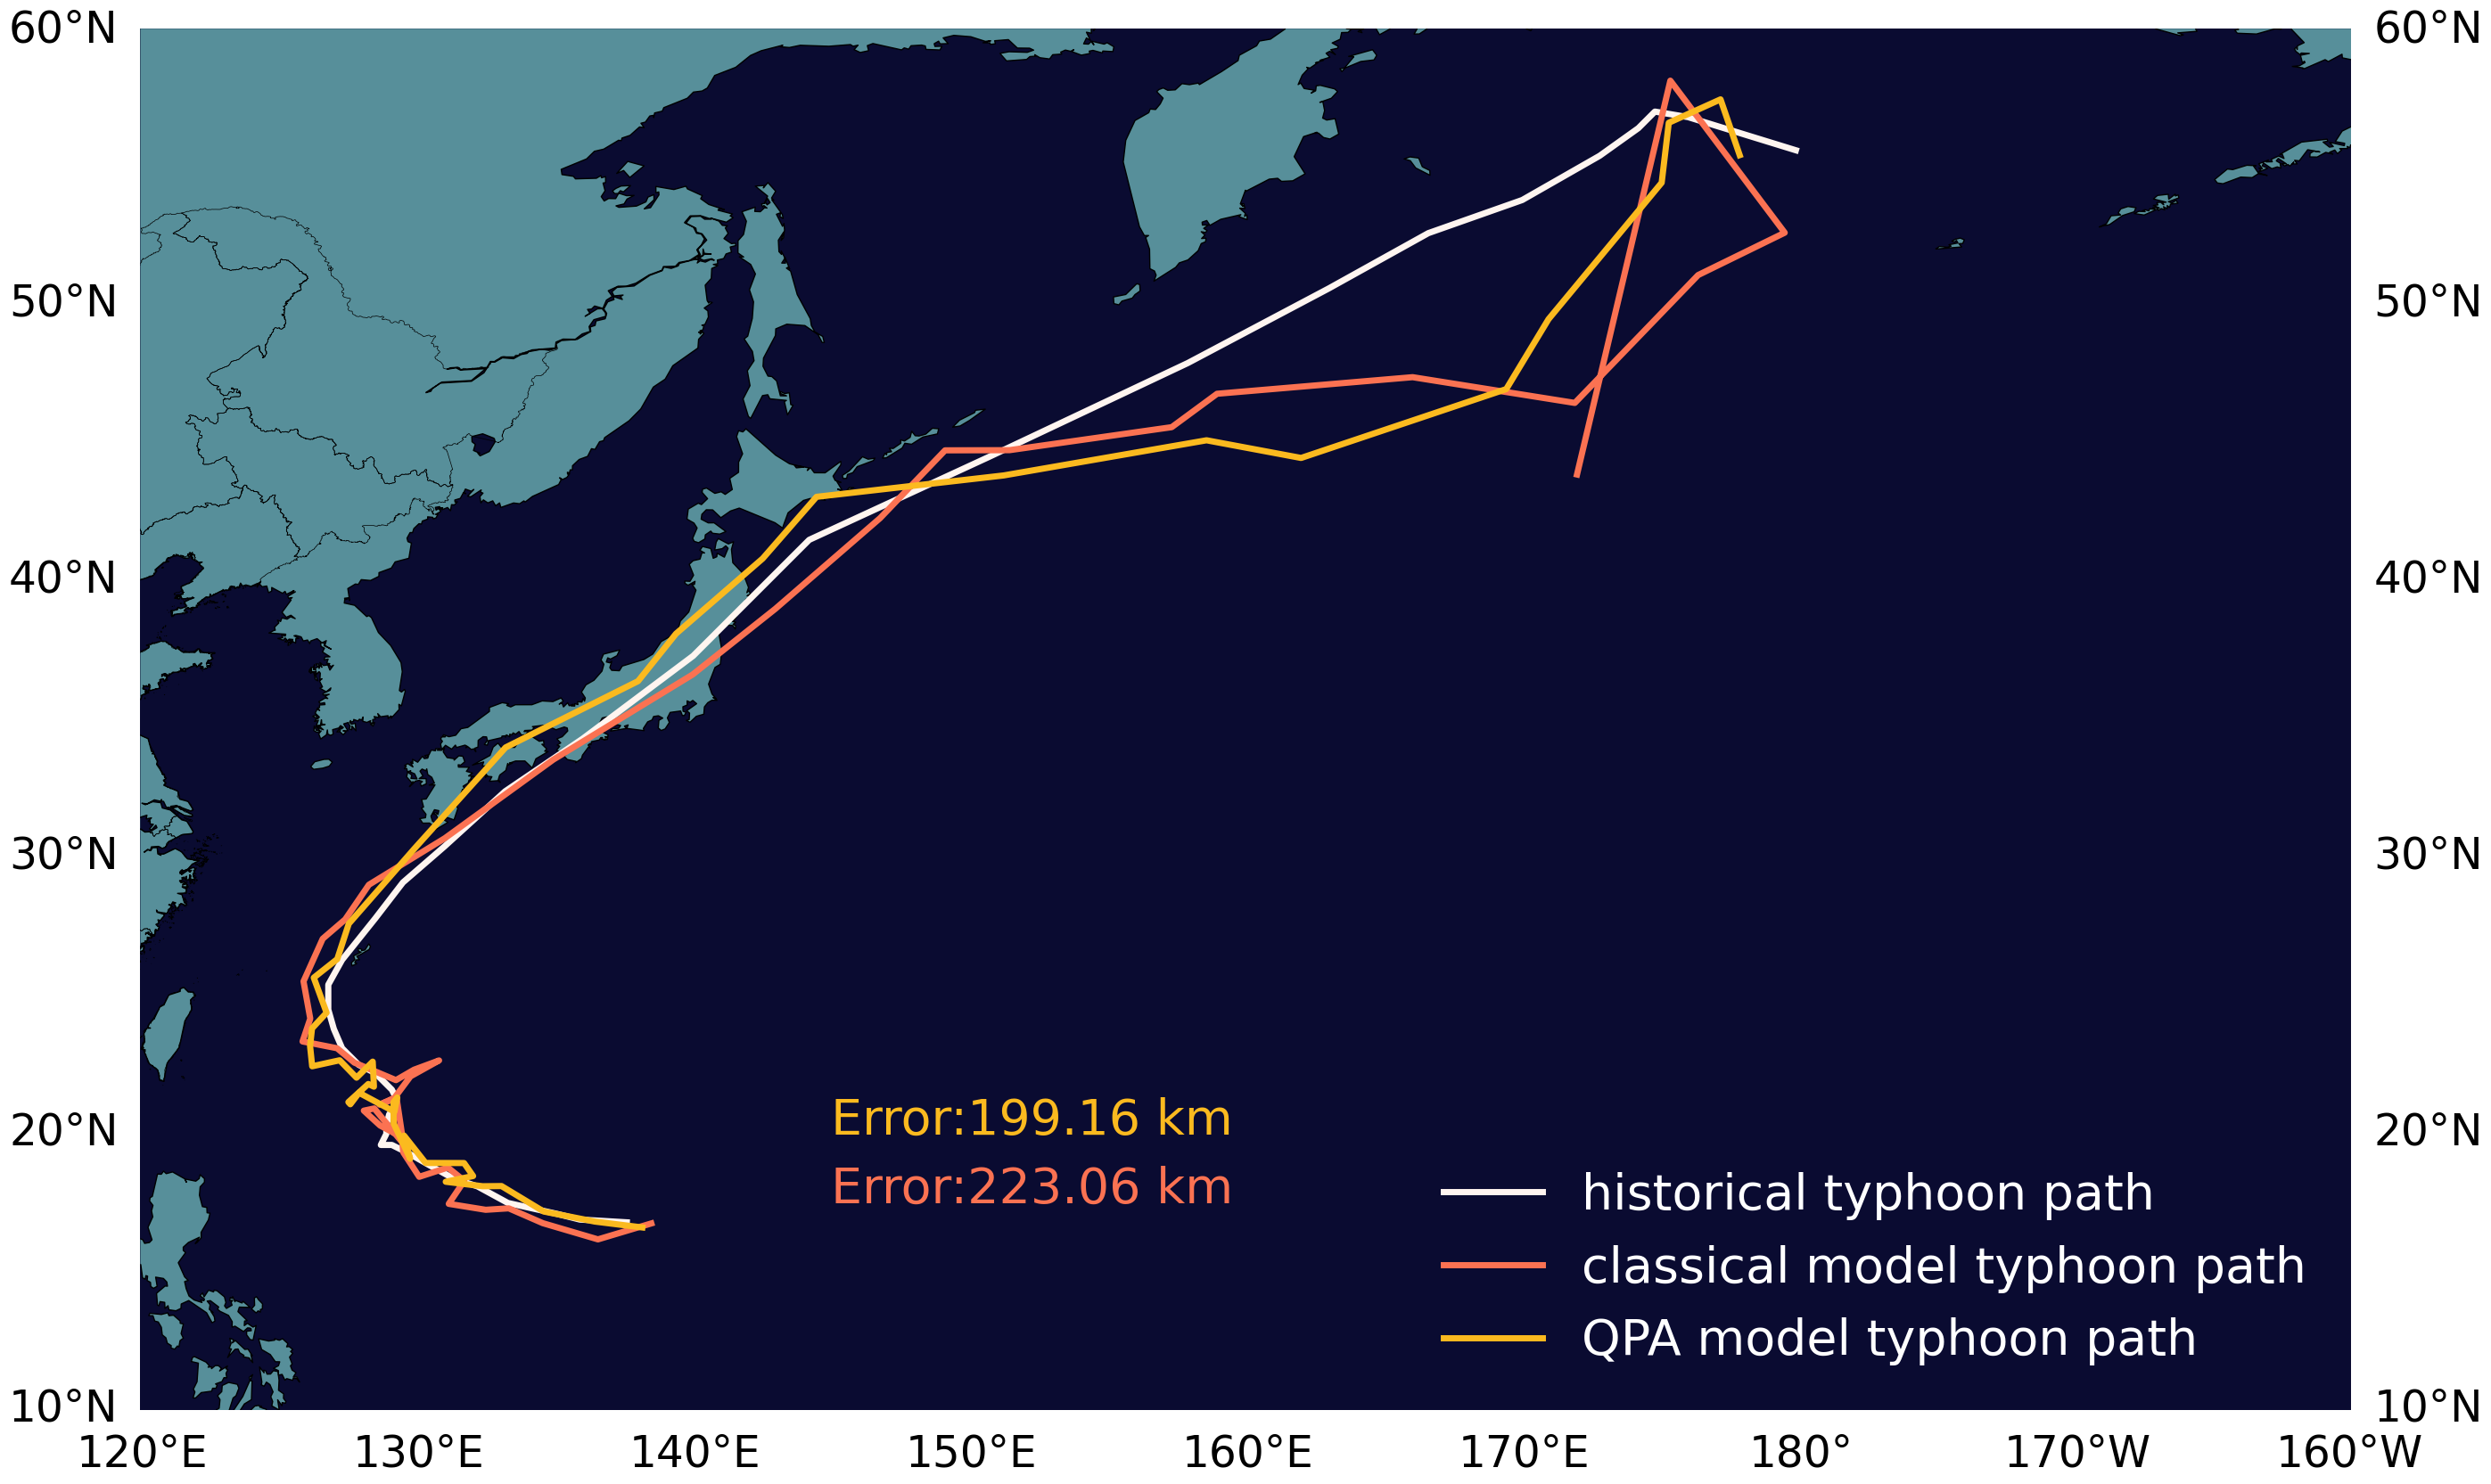

In [6]:
df_typhoon_baseline = df_baseline[df_baseline['KEY']=='2018-27'] # 
df_typhoon_classical_model = df_classical_model[df_classical_model['KEY']=='2018-27'] # 
df_typhoon_model = df_model[df_model['KEY']=='2018-27'] #

fig = plt.figure(figsize=(32,40))
map = Basemap(resolution='l',
              llcrnrlon=120, 
              llcrnrlat=10, 
              urcrnrlon=200, 
              urcrnrlat=60)

# draw
map.drawcoastlines()

CHN = "../data/shapefiles_china/china"# address of shape file
map.readshapefile(CHN,'states',drawbounds=True)


map.drawmapboundary(fill_color= "#0A0B31", linewidth=0)#"#CCD3D9") #'#313b54')
map.fillcontinents(color = "#578F9A")#"#92BD72")

map.drawparallels(np.arange(0,90,10),labels=[1,1,0,1],fontsize=35, linewidth=0.0001)
map.drawmeridians(np.arange(0,360,10),labels=[1,1,0,1],fontsize=35, linewidth=0.0001)

color = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan']
map.plot(df_typhoon_baseline['LONG'], df_typhoon_baseline['LAT'], color='#fff5f0', linewidth=5, label='historical typhoon path')
map.plot(df_typhoon_classical_model['PRED_LONG'], df_typhoon_classical_model['PRED_LAT'], color='#fb7252',linewidth=5, label='classical model typhoon path') #, linestyle="--")
map.plot(df_typhoon_model['PRED_LONG'], df_typhoon_model['PRED_LAT'], color='#fbba1f',linewidth=5, label='QPA model typhoon path')
plt.legend(loc='lower right', prop={'size':40}, framealpha=0, labelcolor="white")
plt.annotate('Error:223.06 km', xy=(145, 17.5),fontsize='40', color='#fb7252')
plt.annotate('Error:199.16 km', xy=(145, 20),fontsize='40', color='#fbba1f')
plt.savefig("../results/plots/2018_27.png", bbox_inches="tight")  # Save as a PDF
plt.show()

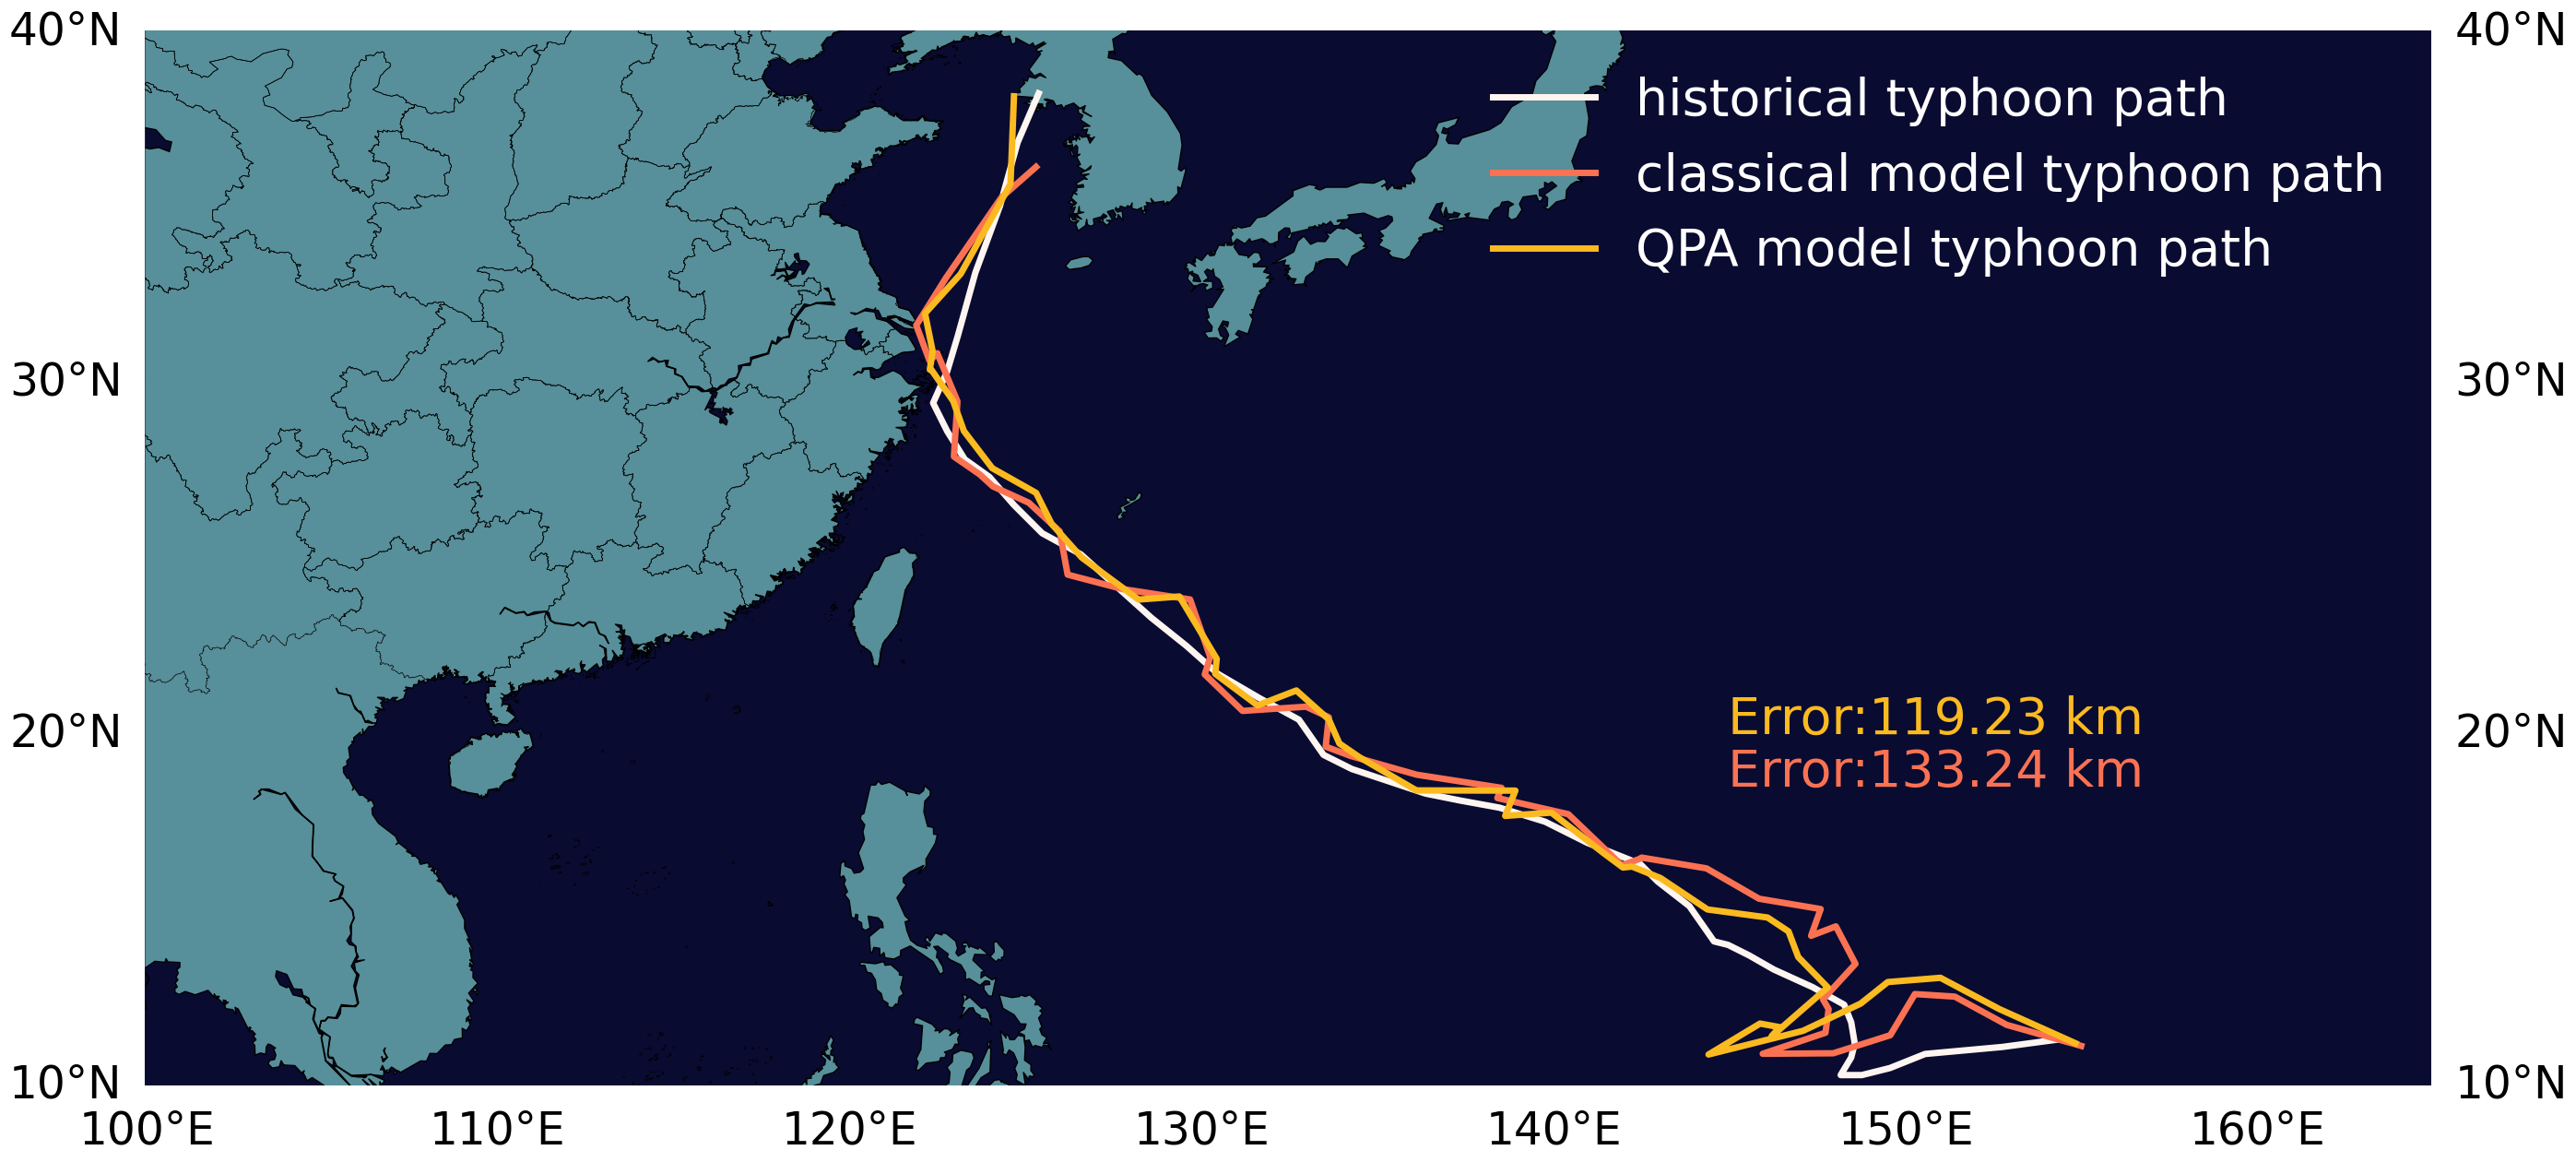

In [7]:
df_typhoon_baseline = df_baseline[df_baseline['KEY']=='2015-09'] # 
df_typhoon_classical_model = df_classical_model[df_classical_model['KEY']=='2015-09'] # 
df_typhoon_model = df_model[df_model['KEY']=='2015-09'] #

fig = plt.figure(figsize=(32,40))
map = Basemap(resolution='l',
              llcrnrlon=100, 
              llcrnrlat=10, 
              urcrnrlon=165, 
              urcrnrlat=40)

# draw
map.drawcoastlines()

CHN = "../data/shapefiles_china/china"# address of shape file
map.readshapefile(CHN,'states',drawbounds=True)

# map.drawmapboundary(fill_color='white')
# map.fillcontinents(color='#D3D3D3')
map.drawmapboundary(fill_color= "#0A0B31", linewidth=0)#"#CCD3D9") #'#313b54')
map.fillcontinents(color = "#578F9A")#"#92BD72")

map.drawparallels(np.arange(0,90,10),labels=[1,1,0,1],fontsize=35, linewidth=0.0001)
map.drawmeridians(np.arange(0,360,10),labels=[1,1,0,1],fontsize=35, linewidth=0.0001)

color = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan']
# a basic map of guangdong 

map.plot(df_typhoon_baseline['LONG'], df_typhoon_baseline['LAT'], color='#fff5f0', linewidth=5, label='historical typhoon path')
map.plot(df_typhoon_classical_model['PRED_LONG'], df_typhoon_classical_model['PRED_LAT'], color='#fb7252',linewidth=5, label='classical model typhoon path') #, linestyle="--")
map.plot(df_typhoon_model['PRED_LONG'], df_typhoon_model['PRED_LAT'], color='#fbba1f',linewidth=5, label='QPA model typhoon path')
plt.legend(loc='upper right', prop={'size':40}, framealpha=0, labelcolor="white")
plt.annotate('Error:133.24 km', xy=(145, 18.5),fontsize='40', color='#fb7252')
plt.annotate('Error:119.23 km', xy=(145, 20),fontsize='40', color='#fbba1f')
plt.savefig("../results/plots/2015_09.png", bbox_inches="tight")  # Save as a PDF
plt.show()

## QPA lossing case

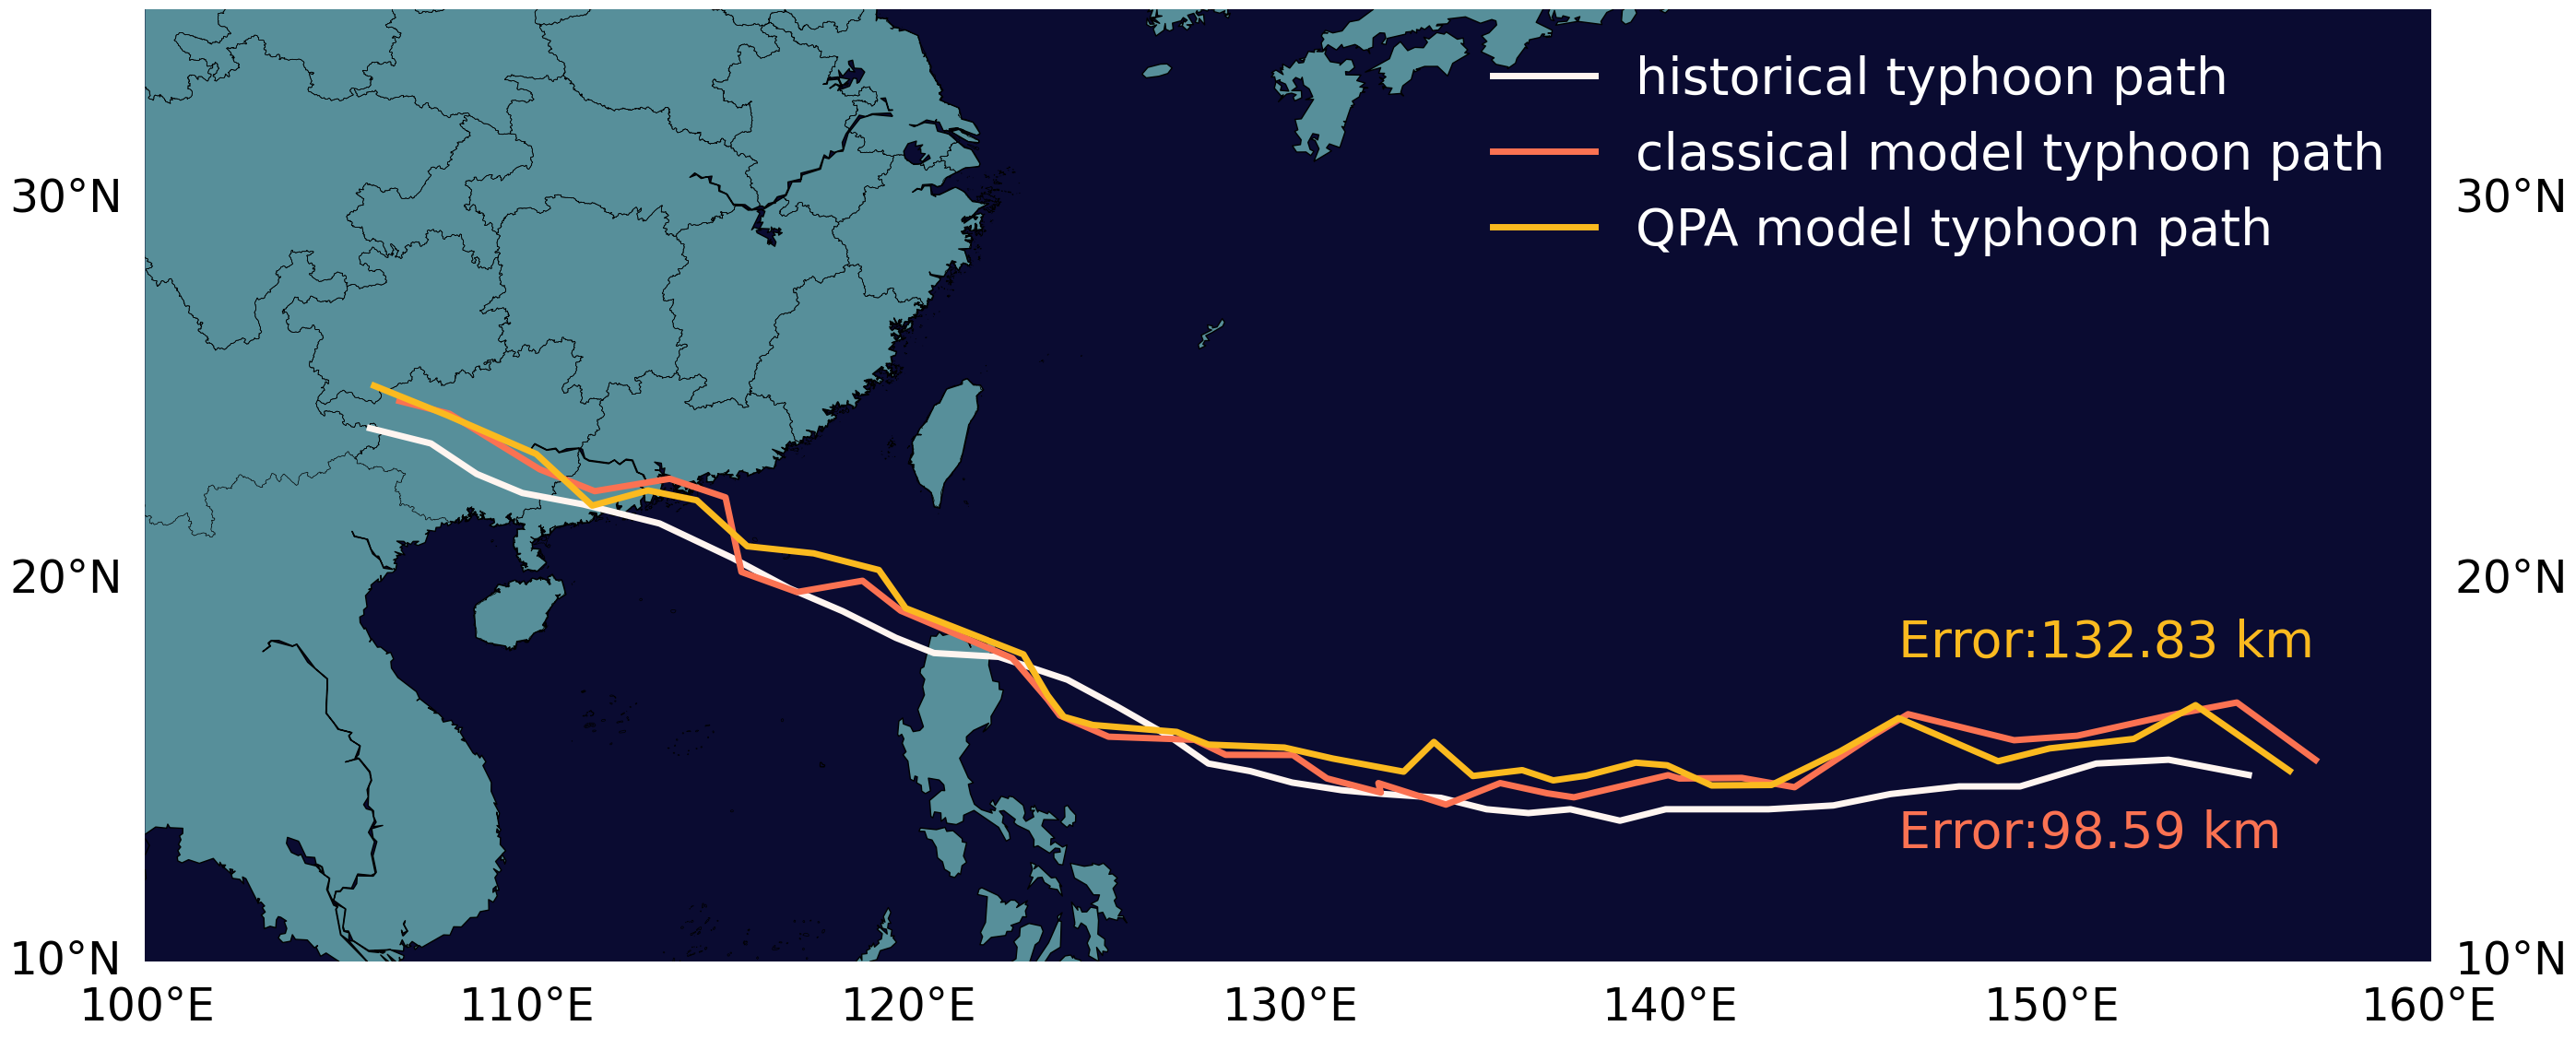

In [8]:
df_typhoon_baseline = df_baseline[df_baseline['KEY']=='2018-25'] # 山竹
df_typhoon_classical_model = df_classical_model[df_classical_model['KEY']=='2018-25'] # 山竹
df_typhoon_model = df_model[df_model['KEY']=='2018-25'] # 山竹

fig = plt.figure(figsize=(32,40))
map = Basemap(resolution='l',
              llcrnrlon=100, 
              llcrnrlat=10, 
              urcrnrlon=160, 
              urcrnrlat=35)

# draw
map.drawcoastlines()

CHN = "../data/shapefiles_china/china"# address of shape file
map.readshapefile(CHN,'states',drawbounds=True)

# map.drawmapboundary(fill_color='white')
# map.fillcontinents(color='#D3D3D3')
map.drawmapboundary(fill_color= "#0A0B31", linewidth=0)#"#CCD3D9") #'#313b54')
map.fillcontinents(color = "#578F9A")#"#92BD72")

map.drawparallels(np.arange(0,90,10),labels=[1,1,0,1],fontsize=35, linewidth=0.0001)
map.drawmeridians(np.arange(0,360,10),labels=[1,1,0,1],fontsize=35, linewidth=0.0001)

color = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan']
map.plot(df_typhoon_baseline['LONG'], df_typhoon_baseline['LAT'], color='#fff5f0', linewidth=5, label='historical typhoon path')
map.plot(df_typhoon_classical_model['PRED_LONG'], df_typhoon_classical_model['PRED_LAT'], color='#fb7252',linewidth=5, label='classical model typhoon path') #, linestyle="--")
map.plot(df_typhoon_model['PRED_LONG'], df_typhoon_model['PRED_LAT'], color='#fbba1f',linewidth=5, label='QPA model typhoon path')
plt.legend(loc='upper right', prop={'size':40}, framealpha=0, labelcolor="white")
plt.annotate('Error:98.59 km', xy=(146, 13),fontsize='40', color='#fb7252')
plt.annotate('Error:132.83 km', xy=(146, 18),fontsize='40', color='#fbba1f')
plt.savefig("../results/plots/2018_25.png", bbox_inches="tight")  # Save as a PDF
plt.show()


# classical model avg distance error: 98.59352221599184
# QPA model avg distance error: 132.83477459555317

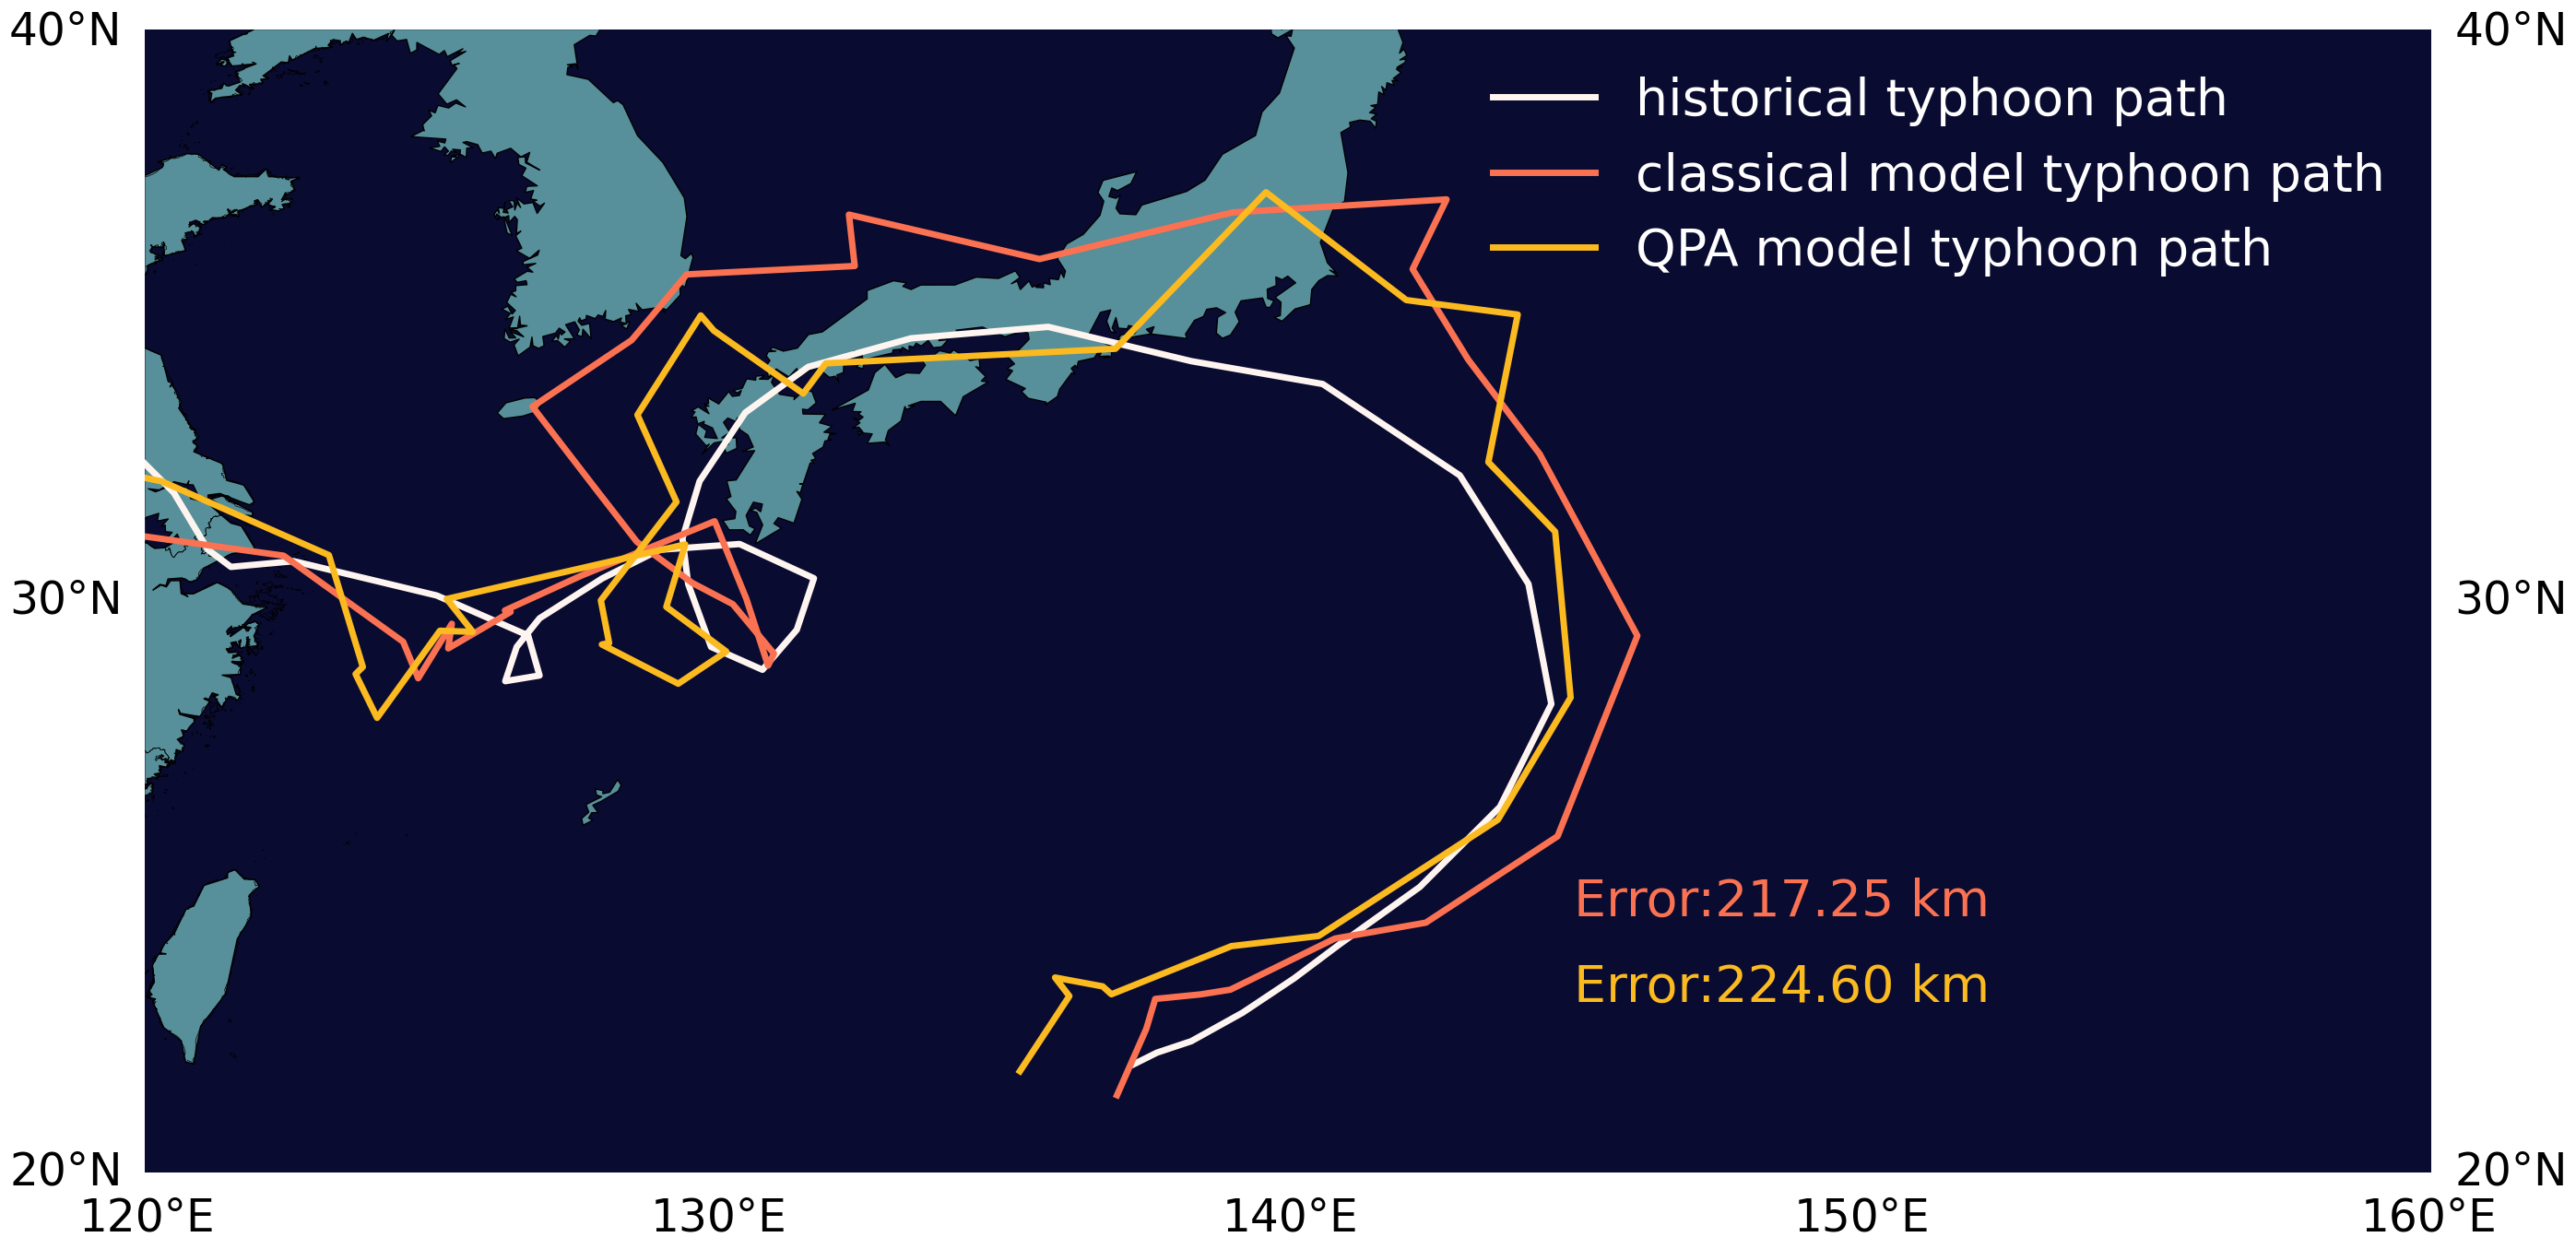

In [9]:
df_typhoon_baseline = df_baseline[df_baseline['KEY']=='2018-13'] # 
df_typhoon_classical_model = df_classical_model[df_classical_model['KEY']=='2018-13'] # 
df_typhoon_model = df_model[df_model['KEY']=='2018-13'] #

fig = plt.figure(figsize=(32,40))
map = Basemap(resolution='l',
              llcrnrlon=120, 
              llcrnrlat=20, 
              urcrnrlon=160, 
              urcrnrlat=40)

# draw
map.drawcoastlines()

CHN = "../data/shapefiles_china/china"# address of shape file
map.readshapefile(CHN,'states',drawbounds=True)

# map.drawmapboundary(fill_color='white')
# map.fillcontinents(color='#D3D3D3')
map.drawmapboundary(fill_color= "#0A0B31", linewidth=0)#"#CCD3D9") #'#313b54')
map.fillcontinents(color = "#578F9A")#"#92BD72")

map.drawparallels(np.arange(0,90,10),labels=[1,1,0,1],fontsize=35, linewidth=0.0001)
map.drawmeridians(np.arange(0,360,10),labels=[1,1,0,1],fontsize=35, linewidth=0.0001)

color = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan']
map.plot(df_typhoon_baseline['LONG'], df_typhoon_baseline['LAT'], color='#fff5f0', linewidth=5, label='historical typhoon path')
map.plot(df_typhoon_classical_model['PRED_LONG'], df_typhoon_classical_model['PRED_LAT'], color='#fb7252',linewidth=5, label='classical model typhoon path') #, linestyle="--")
map.plot(df_typhoon_model['PRED_LONG'], df_typhoon_model['PRED_LAT'], color='#fbba1f',linewidth=5, label='QPA model typhoon path')
plt.legend(loc='upper right', prop={'size':40}, framealpha=0, labelcolor="white")
plt.annotate('Error:217.25 km', xy=(145, 24.5),fontsize='40', color='#fb7252')
plt.annotate('Error:224.60 km', xy=(145, 23),fontsize='40', color='#fbba1f')
plt.savefig("../results/plots/2018_13.png", bbox_inches="tight")  # Save as a PDF
plt.show()

# classical model avg distance error: 217.2539251367147
# QPA model avg distance error: 224.6085808625436